In [1]:
# Libraries we need
import sympy
import sympy.vector
from einsteinpy.geodesic import Geodesic
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, tensor
from numpy import linspace
import matplotlib.pyplot as mpl
from scipy.integrate import solve_ivp
import numpy as np
from scipy.special import struve



# Makes the output look nice
sympy.init_printing()

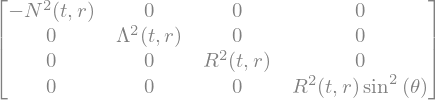

In [2]:
# Defining the coordinate variables as symbols
syms = sympy.symbols('t r theta phi')

# Defining the metric functions as symbolic functions of r and t
N = sympy.Function('N')(syms[0], syms[1])
#NR = sympy.Function('N^r')(syms[0],syms[1])
NR = 0
L = sympy.Function('Lambda')(syms[0], syms[1])
R = sympy.Function('R')(syms[0], syms[1])

# Defining the metric to be 4x4
metric = [[0 for i in range(4)] for i in range(4)]

# Defining the components of the metric
metric[0][0] = ((L)**2)*(NR)**(2)-(N)**2
metric[0][1] = ((L)**2)*(NR)
metric[1][0] = ((L)**2)*(NR)
metric[1][1] = (L)**2
metric[2][2] = ((R)**2)
metric[3][3] = ((R)**2)*(sympy.sin(syms[2]))**2


# Creating the metric object
m_obj = MetricTensor(metric, syms)
m_obj.tensor()

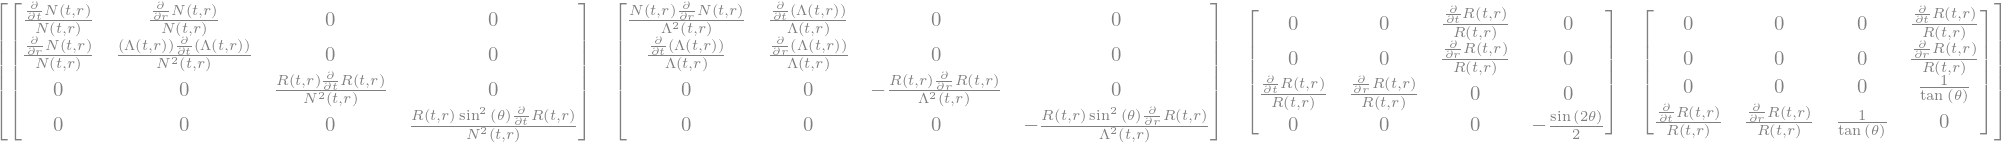

In [3]:
# Computing the Christoffel symbols of the metric
ch = ChristoffelSymbols.from_metric(m_obj)

# Printing the values of the Christoffel symbols in tensor form
sympy.simplify(ch.tensor())

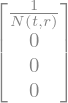

In [4]:
#U vector

U = sympy.Array([1/N,-NR/N,0,0])
sympy.Matrix(U)


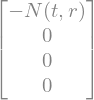

In [5]:
# Finding U lower mu and U lower nu

U_Lmu =  sympy.Matrix(metric) * sympy.Matrix(U)
U_Lnu = sympy.Transpose(U_Lmu)



sympy.simplify(U_Lmu)

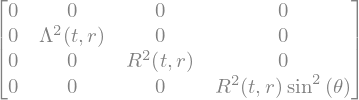

In [6]:
# Finding transverse Metric

h = sympy.Matrix(metric) + U_Lmu*U_Lnu
sympy.simplify(h)

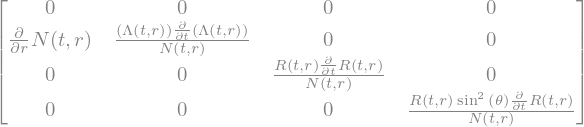

In [7]:
#Computing the elements of B

B = [[0 for i in range(4)] for i in range(4)]

for i in range(4):
    for j in range(4):
        B[j][i] = sympy.diff(U_Lmu[j],syms[i]) - (ch[0][i][j])*U_Lmu[0] - (ch[1][i][j])*U_Lmu[1] - \
        (ch[2][i][j])*U_Lmu[2] - (ch[3][i][j])*U_Lmu[3]


sympy.simplify(sympy.Matrix(B))
#B[0][0]=sympy.diff(U_Lmu[0],syms[0]) -(ch[0][0][0])*U_Lmu[0] - (ch[1][0][0])*U_Lmu[1] - (ch[2][0][0])*U_Lmu[2] - (ch[3][0][0])*U_Lmu[3]
#B[0][1]=sympy.diff(U_Lmu[0],syms[1]) -(ch[0][1][0])*U_Lmu[0] - (ch[1][1][0])*U_Lmu[1] - (ch[2][1][0])*U_Lmu[2] - (ch[3][1][0])*U_Lmu[3]
#B[0][2]=sympy.diff(U_Lmu[0],syms[2]) -(ch[0][2][0])*U_Lmu[0] - (ch[1][2][0])*U_Lmu[1] - (ch[2][2][0])*U_Lmu[2] - (ch[3][2][0])*U_Lmu[3]
#B[0][3]=sympy.diff(U_Lmu[0],syms[3]) -(ch[0][3][0])*U_Lmu[0] - (ch[1][3][0])*U_Lmu[1] - (ch[2][3][0])*U_Lmu[2] - (ch[3][3][0])*U_Lmu[3]
#B[1][0]=sympy.diff(U_Lmu[1],syms[0]) -(ch[0][0][1])*U_Lmu[0] - (ch[1][0][1])*U_Lmu[1] - (ch[2][0][1])*U_Lmu[2] - (ch[3][0][1])*U_Lmu[3]
#B[1][1]=sympy.diff(U_Lmu[1],syms[1]) -(ch[0][1][1])*U_Lmu[0] - (ch[1][1][1])*U_Lmu[1] - (ch[2][1][1])*U_Lmu[2] - (ch[3][1][1])*U_Lmu[3]
#B[1][2]=sympy.diff(U_Lmu[1],syms[2]) -(ch[0][2][1])*U_Lmu[0] - (ch[1][2][1])*U_Lmu[1] - (ch[2][2][1])*U_Lmu[2] - (ch[3][2][1])*U_Lmu[3]
#B[1][3]=sympy.diff(U_Lmu[1],syms[3]) -(ch[0][3][1])*U_Lmu[0] - (ch[1][3][1])*U_Lmu[1] - (ch[2][3][1])*U_Lmu[2] - (ch[3][3][1])*U_Lmu[3]
#B[2][0]=sympy.diff(U_Lmu[2],syms[0]) -(ch[0][0][2])*U_Lmu[0] - (ch[1][0][2])*U_Lmu[1] - (ch[2][0][2])*U_Lmu[2] - (ch[3][0][2])*U_Lmu[3]
#B[2][1]=sympy.diff(U_Lmu[2],syms[1]) -(ch[0][1][2])*U_Lmu[0] - (ch[1][1][2])*U_Lmu[1] - (ch[2][1][2])*U_Lmu[2] - (ch[3][1][2])*U_Lmu[3]
#B[2][2]=sympy.diff(U_Lmu[2],syms[2]) -(ch[0][2][2])*U_Lmu[0] - (ch[1][2][2])*U_Lmu[1] - (ch[2][2][2])*U_Lmu[2] - (ch[3][2][2])*U_Lmu[3]
#B[2][3]=sympy.diff(U_Lmu[2],syms[3]) -(ch[0][3][2])*U_Lmu[0] - (ch[1][3][2])*U_Lmu[1] - (ch[2][3][2])*U_Lmu[2] - (ch[3][3][2])*U_Lmu[3]
#B[3][0]=sympy.diff(U_Lmu[3],syms[0]) -(ch[0][0][3])*U_Lmu[0] - (ch[1][0][3])*U_Lmu[1] - (ch[2][0][3])*U_Lmu[2] - (ch[3][0][3])*U_Lmu[3]
#B[3][1]=sympy.diff(U_Lmu[3],syms[1]) -(ch[0][1][3])*U_Lmu[0] - (ch[1][1][3])*U_Lmu[1] - (ch[2][1][3])*U_Lmu[2] - (ch[3][1][3])*U_Lmu[3]
#B[3][2]=sympy.diff(U_Lmu[3],syms[2]) -(ch[0][2][3])*U_Lmu[0] - (ch[1][2][3])*U_Lmu[1] - (ch[2][2][3])*U_Lmu[2] - (ch[3][2][3])*U_Lmu[3]
#B[3][3]=sympy.diff(U_Lmu[3],syms[3]) -(ch[0][3][3])*U_Lmu[0] - (ch[1][3][3])*U_Lmu[1] - (ch[2][3][3])*U_Lmu[2] - (ch[3][3][3])*U_Lmu[3]

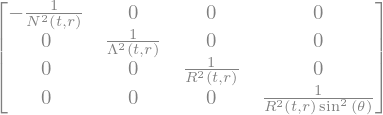

In [8]:
#Inverse metric tensor

Inverse=m_obj.inv()
Inverse.tensor()

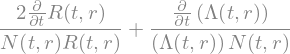

In [9]:
#Creating expansions scalar and solving it component wise

theta = 0
for i in range(4):
    for j in range(4):
        theta +=  Inverse[i][j]*B[i][j]

sympy.simplify(theta)

#theta = Inverse[0][0]*B[0][0] + Inverse[1][0]*B[1][0] + Inverse[2][0]*B[2][0] + Inverse[3][0]*B[3][0] + \
#        Inverse[0][1]*B[0][1] + Inverse[1][1]*B[1][1] + Inverse[2][1]*B[2][1] + Inverse[3][1]*B[3][1] + \
#        Inverse[0][2]*B[0][2] + Inverse[1][2]*B[1][2] + Inverse[2][2]*B[2][2] + Inverse[3][2]*B[3][2] + \
#        Inverse[0][3]*B[0][3] + Inverse[1][3]*B[1][3] + Inverse[2][3]*B[2][3] + Inverse[3][3]*B[3][3]




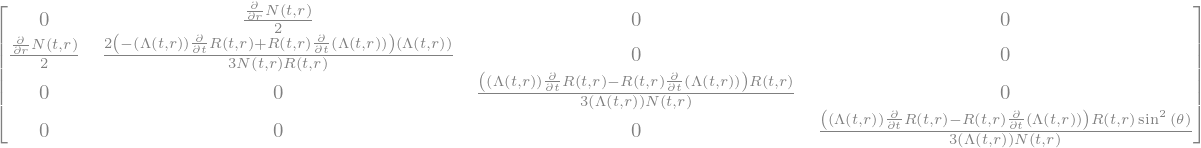

In [10]:
# Finding Shear Tensor

sigma = (sympy.Matrix(B) + sympy.Transpose(sympy.Matrix(B)))/2 - (h*theta)/3
sympy.simplify(sigma)


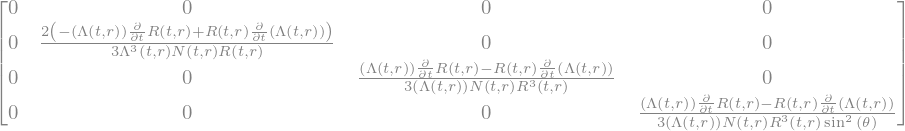

In [11]:
# Finding sigma Upper
sigma_U = [[0 for i in range(4)] for i in range(4)]

for i in range(4):
    for j in range(4):
        for k in range(4):
            sigma_U[j][i] += Inverse[i][k]*Inverse[j][k]*sigma[k,k]

sympy.simplify(sympy.Matrix(sigma_U))
#sigma_U[0][0] = Inverse[0][0]*Inverse[0][0]*sigma[0,0] + Inverse[0][1]*Inverse[0][1]*sigma[1,1] + \
#                Inverse[0][2]*Inverse[0][2]*sigma[2,2] + Inverse[0][3]*Inverse[0][3]*sigma[3,3]
#sigma_U[0][1] = Inverse[0][0]*Inverse[1][0]*sigma[0,0] + Inverse[0][1]*Inverse[1][1]*sigma[1,1] + \
#                Inverse[0][2]*Inverse[1][2]*sigma[2,2] + Inverse[0][3]*Inverse[1][3]*sigma[3,3]
#sigma_U[0][2] = Inverse[0][0]*Inverse[2][0]*sigma[0,0] + Inverse[0][1]*Inverse[2][1]*sigma[1,1] + \
#                Inverse[0][2]*Inverse[2][2]*sigma[2,2] + Inverse[0][3]*Inverse[2][3]*sigma[3,3]
#sigma_U[0][3] = Inverse[0][0]*Inverse[3][0]*sigma[0,0] + Inverse[0][1]*Inverse[3][1]*sigma[1,1] + \
#                Inverse[0][2]*Inverse[3][2]*sigma[2,2] + Inverse[0][3]*Inverse[3][3]*sigma[3,3]

#sigma_U[1][0] = Inverse[1][0]*Inverse[0][0]*sigma[0,0] + Inverse[1][1]*Inverse[0][1]*sigma[1,1] + \
#                Inverse[1][2]*Inverse[0][2]*sigma[2,2] + Inverse[1][3]*Inverse[0][3]*sigma[3,3]
#sigma_U[1][1] = Inverse[1][0]*Inverse[1][0]*sigma[0,0] + Inverse[1][1]*Inverse[1][1]*sigma[1,1] + \
#                Inverse[1][2]*Inverse[1][2]*sigma[2,2] + Inverse[1][3]*Inverse[1][3]*sigma[3,3]
#sigma_U[1][2] = Inverse[1][0]*Inverse[2][0]*sigma[0,0] + Inverse[1][1]*Inverse[2][1]*sigma[1,1] + \
#                Inverse[1][2]*Inverse[2][2]*sigma[2,2] + Inverse[1][3]*Inverse[2][3]*sigma[3,3]
#sigma_U[1][3] = Inverse[1][0]*Inverse[3][0]*sigma[0,0] + Inverse[1][1]*Inverse[3][1]*sigma[1,1] + \
#                Inverse[1][2]*Inverse[3][2]*sigma[2,2] + Inverse[1][3]*Inverse[3][3]*sigma[3,3]

#sigma_U[2][0] = Inverse[2][0]*Inverse[0][0]*sigma[0,0] + Inverse[2][1]*Inverse[0][1]*sigma[1,1] + \
#                Inverse[2][2]*Inverse[0][2]*sigma[2,2] + Inverse[2][3]*Inverse[0][3]*sigma[3,3]
#sigma_U[2][1] = Inverse[2][0]*Inverse[1][0]*sigma[0,0] + Inverse[2][1]*Inverse[1][1]*sigma[1,1] + \
#                Inverse[2][2]*Inverse[1][2]*sigma[2,2] + Inverse[2][3]*Inverse[1][3]*sigma[3,3]
#sigma_U[2][2] = Inverse[2][0]*Inverse[2][0]*sigma[0,0] + Inverse[2][1]*Inverse[2][1]*sigma[1,1] + \
#                Inverse[2][2]*Inverse[2][2]*sigma[2,2] + Inverse[2][3]*Inverse[2][3]*sigma[3,3]
#sigma_U[2][3] = Inverse[2][0]*Inverse[3][0]*sigma[0,0] + Inverse[2][1]*Inverse[3][1]*sigma[1,1] + \
#                Inverse[2][2]*Inverse[3][2]*sigma[2,2] + Inverse[2][3]*Inverse[3][3]*sigma[3,3]

#sigma_U[3][0] = Inverse[3][0]*Inverse[0][0]*sigma[0,0] + Inverse[3][1]*Inverse[0][1]*sigma[1,1] + \
#                Inverse[3][2]*Inverse[0][2]*sigma[2,2] + Inverse[3][3]*Inverse[0][3]*sigma[3,3]
#sigma_U[3][1] = Inverse[3][0]*Inverse[1][0]*sigma[0,0] + Inverse[3][1]*Inverse[1][1]*sigma[1,1] + \
#                Inverse[3][2]*Inverse[1][2]*sigma[2,2] + Inverse[3][3]*Inverse[1][3]*sigma[3,3]
#sigma_U[3][2] = Inverse[3][0]*Inverse[2][0]*sigma[0,0] + Inverse[3][1]*Inverse[2][1]*sigma[1,1] + \
#                Inverse[3][2]*Inverse[2][2]*sigma[2,2] + Inverse[3][3]*Inverse[2][3]*sigma[3,3]
#sigma_U[3][3] = Inverse[3][0]*Inverse[3][0]*sigma[0,0] + Inverse[3][1]*Inverse[3][1]*sigma[1,1] + \
#                Inverse[3][2]*Inverse[3][2]*sigma[2,2] + Inverse[3][3]*Inverse[3][3]*sigma[3,3]


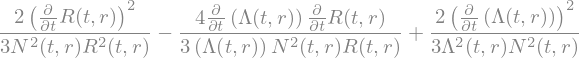

In [12]:
# Computing shear

sigma2 = 0
for i in range(4):
    for j in range(4):
        sigma2 += sigma[j,i]*sigma_U[j][i]

sympy.expand(sigma2)

#sigma2 = sigma[0,0]*sigma_U[0][0] + sigma[0,1]*sigma_U[0][1] + sigma[0,2]*sigma_U[0][2] + sigma[0,3]*sigma_U[0][3] + \
#         sigma[1,0]*sigma_U[1][0] + sigma[1,1]*sigma_U[1][1] + sigma[1,2]*sigma_U[1][2] + sigma[1,3]*sigma_U[1][3] + \
#         sigma[2,0]*sigma_U[2][0] + sigma[2,1]*sigma_U[2][1] + sigma[2,2]*sigma_U[2][2] + sigma[2,3]*sigma_U[2][3] + \
#         sigma[3,0]*sigma_U[3][0] + sigma[3,1]*sigma_U[3][1] + sigma[3,2]*sigma_U[3][2] + sigma[3,3]*sigma_U[3][3]


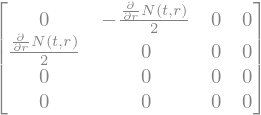

In [13]:
# Computing Omega

omega = (sympy.Matrix(B) - sympy.Transpose(sympy.Matrix(B)))/2
sympy.simplify(omega)

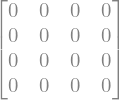

In [14]:
#Computing omega upper

omega_U = [[0 for i in range(4)] for i in range(4)]

for i in range(4):
    for j in range(4):
        for k in range(4):
            omega_U[i][j] += Inverse[i][k]*Inverse[j][k]*omega[k,k]
            
sympy.Matrix(omega_U)
    
#omega_U[0][0] = Inverse[0][0]*Inverse[0][0]*omega[0,0] + Inverse[0][1]*Inverse[0][1]*omega[1,1] + Inverse[0][2]*Inverse[0][2]*omega[2,2] + Inverse[0][3]*Inverse[0][3]*omega[3,3]
#omega_U[1][0] = Inverse[1][0]*Inverse[0][0]*omega[0,0] + Inverse[1][1]*Inverse[0][1]*omega[1,1] + Inverse[1][2]*Inverse[0][2]*omega[2,2] + Inverse[1][3]*Inverse[0][3]*omega[3,3]
#omega_U[2][0] = Inverse[2][0]*Inverse[0][0]*omega[0,0] + Inverse[2][1]*Inverse[0][1]*omega[1,1] + Inverse[2][2]*Inverse[0][2]*omega[2,2] + Inverse[2][3]*Inverse[0][3]*omega[3,3]
#omega_U[3][0] = Inverse[3][0]*Inverse[0][0]*omega[0,0] + Inverse[3][1]*Inverse[0][1]*omega[1,1] + Inverse[3][2]*Inverse[0][2]*omega[2,2] + Inverse[3][3]*Inverse[0][3]*omega[3,3]

#omega_U[0][1] = Inverse[0][0]*Inverse[1][0]*omega[0,0] + Inverse[0][1]*Inverse[1][1]*omega[1,1] + Inverse[0][2]*Inverse[1][2]*omega[2,2] + Inverse[0][3]*Inverse[1][3]*omega[3,3]
#omega_U[1][1] = Inverse[1][0]*Inverse[1][0]*omega[0,0] + Inverse[1][1]*Inverse[1][1]*omega[1,1] + Inverse[1][2]*Inverse[1][2]*omega[2,2] + Inverse[1][3]*Inverse[1][3]*omega[3,3]
#omega_U[2][1] = Inverse[2][0]*Inverse[1][0]*omega[0,0] + Inverse[2][1]*Inverse[1][1]*omega[1,1] + Inverse[2][2]*Inverse[1][2]*omega[2,2] + Inverse[2][3]*Inverse[1][3]*omega[3,3]
#omega_U[3][1] = Inverse[3][0]*Inverse[1][0]*omega[0,0] + Inverse[3][1]*Inverse[1][1]*omega[1,1] + Inverse[3][2]*Inverse[1][2]*omega[2,2] + Inverse[3][3]*Inverse[1][3]*omega[3,3]

#omega_U[0][2] = Inverse[0][0]*Inverse[2][0]*omega[0,0] + Inverse[0][1]*Inverse[2][1]*omega[1,1] + Inverse[0][2]*Inverse[2][2]*omega[2,2] + Inverse[0][3]*Inverse[2][3]*omega[3,3]
#omega_U[1][2] = Inverse[1][0]*Inverse[2][0]*omega[0,0] + Inverse[1][1]*Inverse[2][1]*omega[1,1] + Inverse[1][2]*Inverse[2][2]*omega[2,2] + Inverse[1][3]*Inverse[2][3]*omega[3,3]
#omega_U[2][2] = Inverse[2][0]*Inverse[2][0]*omega[0,0] + Inverse[2][1]*Inverse[2][1]*omega[1,1] + Inverse[2][2]*Inverse[2][2]*omega[2,2] + Inverse[2][3]*Inverse[2][3]*omega[3,3]
#omega_U[3][2] = Inverse[3][0]*Inverse[2][0]*omega[0,0] + Inverse[3][1]*Inverse[2][1]*omega[1,1] + Inverse[3][2]*Inverse[2][2]*omega[2,2] + Inverse[3][3]*Inverse[2][3]*omega[3,3]

#omega_U[0][3] = Inverse[0][0]*Inverse[3][0]*omega[0,0] + Inverse[0][1]*Inverse[3][1]*omega[1,1] + Inverse[0][2]*Inverse[3][2]*omega[2,2] + Inverse[0][3]*Inverse[3][3]*omega[3,3]
#omega_U[1][3] = Inverse[1][0]*Inverse[3][0]*omega[0,0] + Inverse[1][1]*Inverse[3][1]*omega[1,1] + Inverse[1][2]*Inverse[3][2]*omega[2,2] + Inverse[1][3]*Inverse[3][3]*omega[3,3]
#omega_U[2][3] = Inverse[2][0]*Inverse[3][0]*omega[0,0] + Inverse[2][1]*Inverse[3][1]*omega[1,1] + Inverse[2][2]*Inverse[3][2]*omega[2,2] + Inverse[2][3]*Inverse[3][3]*omega[3,3]
#omega_U[3][3] = Inverse[3][0]*Inverse[3][0]*omega[0,0] + Inverse[3][1]*Inverse[3][1]*omega[1,1] + Inverse[3][2]*Inverse[3][2]*omega[2,2] + Inverse[3][3]*Inverse[3][3]*omega[3,3]

In [15]:
omega2 = 0
for i in range(4):
    for j in range(4):
        omega2 += omega[j,i]*omega_U[j][i]

        

sympy.expand(omega2)

# omega2 =  omega[0,0]*omega_U[0][0] + omega[0,1]*omega_U[0][1] + omega[0,2]*omega_U[0][2] + omega[0,3]*omega_U[0][3] + \
#           omega[1,0]*omega_U[1][0] + omega[1,1]*omega_U[1][1] + omega[1,2]*omega_U[1][2] + omega[1,3]*omega_U[1][3] + \
#           omega[2,0]*omega_U[2][0] + omega[2,1]*omega_U[2][1] + omega[2,2]*omega_U[2][2] + omega[2,3]*omega_U[2][3] + \
#           omega[3,0]*omega_U[3][0] + omega[3,1]*omega_U[3][1] + omega[3,2]*omega_U[3][2] + omega[3,3]*omega_U[3][3]

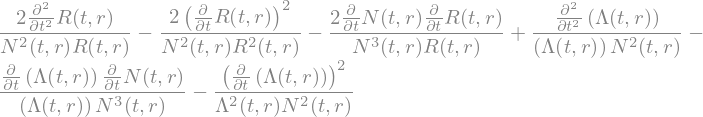

In [16]:
#rate of change of expansion scalar

dtheta = 1/N*(sympy.diff(theta,syms[0]))
sympy.simplify(dtheta)

In [17]:
# Defining the coordinate variables for the effective equations of motions
syms1 = sympy.symbols('tau l G m gamma beta delta_x delta v h_0 alpha h_-1 xi')

# Defining the metric functions as symbolic functions of tau
R = sympy.Function('R')(syms1[0])
PR = sympy.Function('P_R')(syms1[0])
PL = sympy.Function('P_Lamda')(syms1[0])
Lambda = sympy.Function('Lambda')(syms1[0])
l = syms1[1]
G = syms1[2]
m = syms1[3]
gamma = syms1[4]
beta = syms1[5]
deltx = syms1[6]
delt = syms1[7]
v = syms1[8]
h0 = syms1[9]
alpha = syms1[10]
h1 = syms1[11]
xi = syms1[12]


In [18]:
#Testing values
hbar = 1
c = 1
G = 1
m = 3
beta = 0.7

l = float(sympy.sqrt(hbar*G/c**3))
gamma = 0.274
mp = float(sympy.sqrt(hbar*c/G))
deltx = 0.729/(beta**2) #
delt = 2.916/(beta**2) #
h0 = 1 # Replace with struve function. Gamma*G*alpha*PL/R**2
alpha = float(sympy.sqrt(2*sympy.pi)*beta/(8*gamma))
h1 = 1
v = 1.802
epsilon = float(mp*sympy.sqrt(j)/m)         #float(sympy.sqrt((1/(8*sympy.pi)*(beta/(4*l*gamma))**2)*m/m))

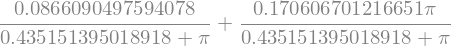

In [19]:
#Computing dR/dtau

#omega = gamma*G*alpha*PL/R**2

R = 1
Lambda = 1
PR = 1
PL = 1

dR = ((R/(2*G*m))*(sympy.cos(gamma*G*beta*((PR/(R*Lambda)) - PL/R**2))))*((((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-\
8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((((sympy.pi)*h0))/\
(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*h0)))+(((1+((l**4)*gamma**2)/((beta**2)*R**2))-\
8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/\
(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0))))
dR



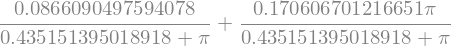

In [20]:
#Computing dPL/dtau

R = 1
Lambda = 1
PR = 1
PL = 1

dPL = ((R*PR/(2*G*m*Lambda))*(sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2))))*((((1+((2*l**4)*gamma**2)/\
((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((sympy.pi)*h0))/\
(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*h0))+(((1+((l**4)*gamma**2)/((beta**2)*R**2))\
-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*((2*sympy.sin(gamma*G*alpha*PL/R**2)/\
(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0)))))
dPL


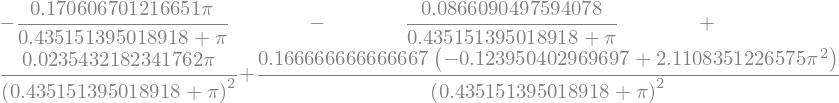

In [21]:
#Computing dLambda/dtau

R = 1
Lambda = 1
PR = 1
PL = 1

dLambda = (Lambda/(2*G*m))*((-sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2)))*((((1+((2*l**4)*gamma**2)/((beta**2)*\
R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((((sympy.pi)*h0))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*h0)))+(((1+((l**4)*\
gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/(delt*R**2)))*\
(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0)))) + \
((sympy.pi*h1)*(((1+(2*l**4*gamma**2)/(alpha**2*R**2) + \
(24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))*(2*(sympy.sin(gamma*G*alpha*PL/R**2))**2))+\
(-8*gamma**2*sympy.cos(alpha/R)*(sympy.sin(alpha/(2*R)))**2)))/((2*sympy.sin(gamma*G*alpha*PL/R**2)+\
(sympy.pi*h0))**2) + ((sympy.cos(gamma*G*alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/(alpha**2*\
R**2) + (24*l**2*gamma**2)/(deltx*R**2) -(8*(1+v)*l**2*gamma**2/(delt*R**2)))*((sympy.pi)**2*\
(h0**2)))+(-16*gamma**2*sympy.cos(alpha/R)*(sympy.sin(alpha/(2*R)))**2)))/\
((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*h0))**2) + \
(((2*sympy.pi*gamma**2*alpha*l**2)/(beta*R**2))*(l**2/beta**2 + (32*(1-v))/delt)*sympy.sin(gamma*G*beta*(PR/(R*\
Lambda)-PL/R**2)))*(((sympy.sin(gamma*G*alpha*PL/R**2)*h1)-(sympy.cos(gamma*G*alpha*\
PL/R**2)*h0))/((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*h0))**2)))
dLambda



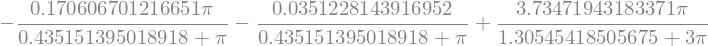

In [22]:
#Computing dPR/dtau

# R = 1
# Lambda = 1
# PR = 1
# PL = 1

dPR = (((R*PR-2*Lambda*PL)/(2*G*m*R) * (sympy.cos(gamma*G*beta*(PR/(R*Lambda)-PL/R**2))))*((((1+((2*l**4)*gamma**2)/\
((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((sympy.pi*h0)/\
(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0)))+(((1+((l**4)*\
gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/(delt*R**2)))*\
(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0)))))+\
(((sympy.pi*Lambda*PL*sympy.sin(alpha*gamma*G*PL/R**2)*h1)/\
(G*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0)))*(1+(2*l**4*gamma**2)/(alpha**2*R**2) + \
(24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2))))+((sympy.pi*Lambda*h0)/\
((G**2*m*R)*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0)))*((((sympy.sin(gamma*G*alpha*PL/R**2)))*\
(2*l**4*gamma/alpha**3 + 24*l**2*gamma/(alpha*deltx)-(8*gamma*l**2*(1+v))/(alpha*delt)))+((G*PL*\
sympy.cos(gamma*G*alpha*PL/R**2))*(1+2*l**4*gamma**2/((R**2)*alpha**2)+24*l**2*gamma**2/(R**2*deltx)-\
8*gamma**2*l**2*(1+v)/(R**2*delt))))+ ((Lambda*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))/\
(G**2*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0)))*(((G*PL*h1*sympy.pi*alpha/beta)*(1+2*l**4*gamma**2/\
(R**2*beta**2)+8*l**2*gamma**2*(3-v)/(R**2*delt)-(8*l**2*gamma**2/\
(R**2*deltx))))+((2*sympy.pi*h0)*(l**4*gamma/beta**3 + 4*l**2*gamma*(3-v)/(beta*delt)-4*l**2*\
gamma/(beta*deltx)))+(sympy.sin(gamma*G*alpha*PL/R**2))*(2*l**4*gamma/beta**3+16*l**2*gamma*(3*v-1)/(beta*delt)-16*\
l**2*gamma/(beta*deltx))+((2*G*PL*alpha/beta)*sympy.cos(gamma*G*alpha*PL/R**2)*((1+l**4*gamma**2/\
(R**2*beta**2))+8*l**2*gamma**2*(3*v-1)/(R**2*delt)-8*l**2*gamma**2/(R**2*deltx))))-((2*gamma*Lambda/(G**2*m))*\
(sympy.sin(alpha/R)-sympy.sin(2*alpha/R))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0))
dPR


In [23]:
# INDIVIDIAL TERMS CHECK
R = 1
Lambda = 1
PR = 1
PL = 1

dR = R/(2*G*m)*sympy.cos(gamma*G*beta*((PR/(R*Lambda)) - PL/R**2))*(((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-\
    8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((sympy.pi)*struve(0,gamma*\
    G*alpha*PL/R**2)))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*alpha*PL/R**2))+\
    ((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/\
    (delt*R**2))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))
float(dR)
    


In [24]:
dPL = dR * PR / Lambda
float(dPL)

In [25]:
dLambda = (Lambda/(2*G*m))*((-sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2)))*((((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((((sympy.pi)*\
    struve(0,gamma*G*alpha*PL/R**2)))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*\
    alpha*PL/R**2))))+(((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*\
    gamma**2)/(delt*R**2)))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))) +((sympy.pi*struve(-1,gamma*G*alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/\
    (alpha**2*R**2) +(24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))*(2*\
    (sympy.sin(gamma*G*alpha*PL/R**2))**2))+(-8*gamma**2*sympy.cos(alpha/R)*(sympy.sin(alpha/(2*R)))**2)))/\
    ((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + ((sympy.cos(gamma*G*\
    alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) -\
    (8*(1+v)*l**2*gamma**2/(delt*R**2)))*((sympy.pi)**2*((struve(0,gamma*G*alpha*PL/R**2))**2)))+\
    (-16*gamma**2*sympy.cos(alpha/R)*(sympy.sin(alpha/(2*R)))**2)))/((2*sympy.sin(gamma*G*alpha*PL/R**2)+\
    (sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + (((2*sympy.pi*gamma**2*alpha*l**2)/(beta*R**2))*\
    (l**2/beta**2 + (32*(1-v))/delt)*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))*(((sympy.sin(gamma*G*alpha*\
    PL/R**2)*struve(-1,gamma*G*alpha*PL/R**2))-(sympy.cos(gamma*G*alpha*PL/R**2)*struve(0,gamma*G*alpha*PL/R**2)))/\
    ((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2)))
float(dLambda)

In [26]:
dPR = ((((R*PR-2*Lambda*PL)/(2*G*m*R) * (sympy.cos(gamma*G*beta*(PR/(R*Lambda)-PL/R**2))))*(((1+((2*l**4)*gamma**2)/\
((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*\
((sympy.pi*struve(0,gamma*G*alpha*PL/R**2))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
struve(0,gamma*G*alpha*PL/R**2))) + ((1+((l**4)*\
gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/(delt*R**2)))*\
(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))))+\
((((sympy.pi*Lambda*PL*sympy.sin(alpha*gamma*G*PL/R**2)*struve(-1,gamma*G*alpha*PL/R**2))/\
(G*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))))*\
(1+(2*l**4*gamma**2)/(alpha**2*R**2) + \
(24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))) +  (((sympy.pi*Lambda*\
struve(0,gamma*G*alpha*PL/R**2))/((G**2*m*R)*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
struve(0,gamma*G*alpha*PL/R**2))))*(((sympy.sin(gamma*G*alpha*PL/R**2)))*\
(2*l**4*gamma/alpha**3 + 24*l**2*gamma/(alpha*deltx)-(8*gamma*l**2*(1+v))/(alpha*delt)) +\
(G*PL*sympy.cos(gamma*G*alpha*PL/R**2))*\
(1+2*l**4*gamma**2/((R**2)*alpha**2)+24*l**2*gamma**2/(R**2*deltx)-\
8*gamma**2*l**2*(1+v)/(R**2*delt)))))+((Lambda*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))/\
(G**2*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))) *\
(((G*PL*struve(-1,gamma*G*alpha*PL/R**2)*sympy.pi*alpha/beta)*\
(1+2*l**4*gamma**2/(R**2*beta**2)+8*l**2*gamma**2*(3-v)/(R**2*delt)-(8*l**2*gamma**2/(R**2*deltx))))+\
((2*sympy.pi*struve(0,gamma*G*alpha*PL/R**2))*(l**4*gamma/beta**3 + 4*l**2*gamma*(3-v)/\
(beta*delt)-4*l**2*gamma/(beta*deltx)))+((sympy.sin(gamma*G*alpha*PL/R**2))*\
(2*l**4*gamma/beta**3+16*l**2*gamma*(3*v-1)/(beta*delt)-16*l**2*\
gamma/(beta*deltx)))+((2*G*PL*alpha/beta)*sympy.cos(gamma*G*alpha*PL/R**2) * \
((1+l**4*gamma**2/(R**2*beta**2))+8*l**2*\
gamma**2*(3*v-1)/(R**2*delt)-8*l**2*gamma**2/(R**2*deltx))))-((2*gamma*Lambda/(G**2*m))*(sympy.sin(alpha/R)-\
sympy.sin(2*alpha/R))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))

float(dPR)


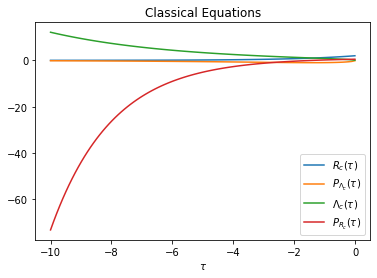

In [27]:
# Computing and plotting Classical equations

tau2 = linspace(-0.01,-10,100) #Try 0 to -2 to compare

G = 1
m = 1
RC = 2*G*m*np.exp(tau2/(2*G*m))
LC = np.sqrt(np.exp(-tau2/(2*G*m))-1)
PRC = 1/(2*G) * (2-np.exp(-tau2/(2*G*m)))
PLC = -2*m*np.exp(tau2/(4*G*m))*np.sqrt(1-np.exp(tau2/(2*G*m)))

mpl.plot(tau2,RC,label=r'$R_c(\tau)$')
mpl.plot(tau2,PLC,label=r'$P_{\Lambda_c}(\tau)$')
mpl.plot(tau2,LC,label=r'$\Lambda_c(\tau)$')
mpl.plot(tau2,PRC,label=r'$P_{R_c}(\tau)$')
mpl.title('Classical Equations')
#mpl.xlim([-2,0])
mpl.xlabel(r'$\tau$')
mpl.legend()
mpl.show()

In [28]:
# Getting initial conditions from classical equations at event horizon.
INIT = [RC[0], PLC[0], LC[0], PRC[0]]
R, PL, Lambda, PR = INIT
INIT

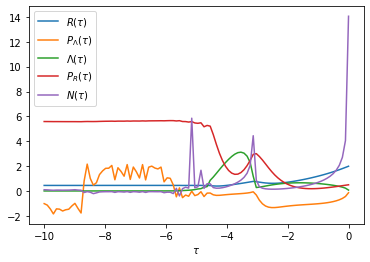

In [29]:
#Numerically solving the equations of motion and plotting

def odes(tau, x):
    
    R, PL, Lambda, PR = x

    dR = R/(2*G*m)*sympy.cos(gamma*G*beta*((PR/(R*Lambda)) - PL/R**2))*(((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-\
    8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((sympy.pi)*struve(0,gamma*\
    G*alpha*PL/R**2)))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*alpha*PL/R**2))+\
    ((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/\
    (delt*R**2))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))
    
    dPL = (R*PR/(2*G*m*Lambda)*(sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2))))*(((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((sympy.pi)*\
    struve(0,gamma*G*alpha*PL/R**2))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*alpha*PL/R**2))+\
    ((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/\
    (delt*R**2))*((2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2)))))
    
    dLambda = (Lambda/(2*G*m))*((-sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2)))*((((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((((sympy.pi)*\
    struve(0,gamma*G*alpha*PL/R**2)))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*\
    alpha*PL/R**2))))+(((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*\
    gamma**2)/(delt*R**2)))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))) +((sympy.pi*struve(-1,gamma*G*alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/\
    (alpha**2*R**2) +(24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))*(2*\
    (sympy.sin(gamma*G*alpha*PL/R**2))**2))+(-8*gamma**2*sympy.cos(alpha/R)*(sympy.sin(alpha/(2*R)))**2)))/\
    ((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + ((sympy.cos(gamma*G*\
    alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) -\
    (8*(1+v)*l**2*gamma**2/(delt*R**2)))*((sympy.pi)**2*((struve(0,gamma*G*alpha*PL/R**2))**2)))+\
    (-16*gamma**2*sympy.cos(alpha/R)*(sympy.sin(alpha/(2*R)))**2)))/((2*sympy.sin(gamma*G*alpha*PL/R**2)+\
    (sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + (((2*sympy.pi*gamma**2*alpha*l**2)/(beta*R**2))*\
    (l**2/beta**2 + (32*(1-v))/delt)*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))*(((sympy.sin(gamma*G*alpha*\
    PL/R**2)*struve(-1,gamma*G*alpha*PL/R**2))-(sympy.cos(gamma*G*alpha*PL/R**2)*struve(0,gamma*G*alpha*PL/R**2)))/\
    ((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2)))
    
    dPR = ((((R*PR-2*Lambda*PL)/(2*G*m*R) * (sympy.cos(gamma*G*beta*(PR/(R*Lambda)-PL/R**2))))*(((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*\
    ((sympy.pi*struve(0,gamma*G*alpha*PL/R**2))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))) + ((1+((l**4)*\
    gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/(delt*R**2)))*\
    (2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))))+\
    ((((sympy.pi*Lambda*PL*sympy.sin(alpha*gamma*G*PL/R**2)*struve(-1,gamma*G*alpha*PL/R**2))/\
    (G*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))))*\
    (1+(2*l**4*gamma**2)/(alpha**2*R**2) + \
    (24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))) +  (((sympy.pi*Lambda*\
    struve(0,gamma*G*alpha*PL/R**2))/((G**2*m*R)*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))*(((sympy.sin(gamma*G*alpha*PL/R**2)))*\
    (2*l**4*gamma/alpha**3 + 24*l**2*gamma/(alpha*deltx)-(8*gamma*l**2*(1+v))/(alpha*delt)) +\
    (G*PL*sympy.cos(gamma*G*alpha*PL/R**2))*\
    (1+2*l**4*gamma**2/((R**2)*alpha**2)+24*l**2*gamma**2/(R**2*deltx)-\
    8*gamma**2*l**2*(1+v)/(R**2*delt)))))+((Lambda*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))/\
    (G**2*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))) *\
    (((G*PL*struve(-1,gamma*G*alpha*PL/R**2)*sympy.pi*alpha/beta)*\
    (1+2*l**4*gamma**2/(R**2*beta**2)+8*l**2*gamma**2*(3-v)/(R**2*delt)-(8*l**2*gamma**2/(R**2*deltx))))+\
    ((2*sympy.pi*struve(0,gamma*G*alpha*PL/R**2))*(l**4*gamma/beta**3 + 4*l**2*gamma*(3-v)/\
    (beta*delt)-4*l**2*gamma/(beta*deltx)))+((sympy.sin(gamma*G*alpha*PL/R**2))*\
    (2*l**4*gamma/beta**3+16*l**2*gamma*(3*v-1)/(beta*delt)-16*l**2*\
    gamma/(beta*deltx)))+((2*G*PL*alpha/beta)*sympy.cos(gamma*G*alpha*PL/R**2) * \
    ((1+l**4*gamma**2/(R**2*beta**2))+8*l**2*\
    gamma**2*(3*v-1)/(R**2*delt)-8*l**2*gamma**2/(R**2*deltx))))-((2*gamma*Lambda/(G**2*m))*(sympy.sin(alpha/R)-\
    sympy.sin(2*alpha/R))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))

    return [dR, dPL, dLambda, dPR]

x0 = INIT
    
tau = [-0.01,-10]
points = np.linspace(-0.01,-10,100)
solve = solve_ivp(odes,tau,x0,t_eval = points)

R, PL, Lambda, PR = solve.y

#Computing the defined Lapse
N = -(gamma*epsilon*R)/(G*m*(np.sin(G*epsilon*gamma*PL/R)+(np.pi/2)*struve(0,G*epsilon*gamma*PL/R))) 


mpl.plot(points,R,label=r'$R(\tau)$')
mpl.plot(points,PL,label=r'$P_{\Lambda}(\tau)$')
mpl.plot(points,Lambda,label=r'$\Lambda(\tau)$')
mpl.plot(points,PR,label=r'$P_R(\tau)$')
mpl.plot(points,N,label=r'$N(\tau)$')
#mpl.xlim([-10,0])
#mpl.ylim(-1,1)
mpl.xlabel(r'$\tau$')
mpl.legend()
mpl.show()


    

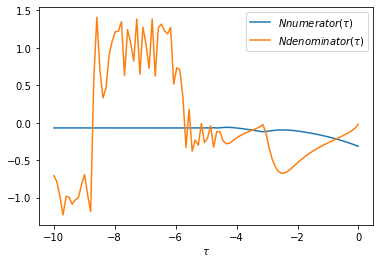

In [30]:
NTOP = -(gamma*epsilon*R)
NBOT = (G*m*(np.sin(G*epsilon*gamma*PL/R)+(np.pi/2)*struve(0,G*epsilon*gamma*PL/R)))
mpl.plot(points,NTOP,label=r'$Nnumerator(\tau)$')
mpl.plot(points,NBOT,label=r'$Ndenominator(\tau)$')
mpl.xlabel(r'$\tau$')
mpl.legend()
mpl.show()

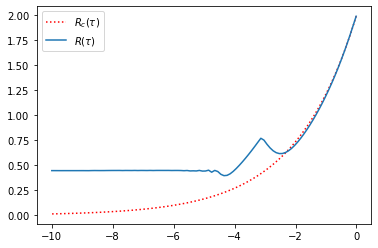

In [31]:
#Plotting EOM together

mpl.plot(points,RC,'r:',label=r'$R_c(\tau)$')
mpl.plot(points,R,label=r'$R(\tau)$')
mpl.legend()
mpl.show()

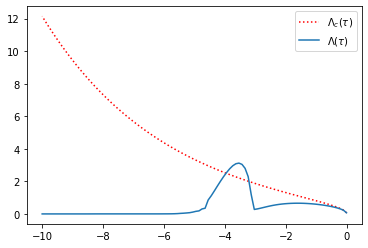

In [32]:
mpl.plot(points,LC,'r:',label=r'$\Lambda_c(\tau)$')
mpl.plot(points,Lambda,label=r'$\Lambda(\tau)$')
mpl.legend()
mpl.show()

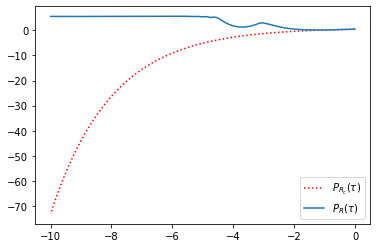

In [33]:
mpl.plot(points,PRC,'r:',label=r'$P_{R_c}(\tau)$')
mpl.plot(points,PR,label=r'$P_R(\tau)$')
mpl.legend()
mpl.show()

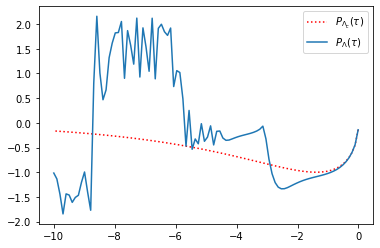

In [34]:
mpl.plot(points,PLC,'r:',label=r'$P_{\Lambda_c}(\tau)$')
mpl.plot(points,PL,label=r'$P_{\Lambda}(\tau)$')
mpl.legend()
mpl.show()

In [35]:
#Rewriting EOM with found solutions and in terms of numpy for array calculations

dR = R/(2*G*m)*np.cos(gamma*G*beta*((PR/(R*Lambda)) - PL/R**2))*(((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-\
8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((np.pi)*struve(0,gamma*G*alpha*PL/R**2)))/\
(2*np.sin(gamma*G*alpha*PL/R**2)+(np.pi)*struve(0,gamma*G*alpha*PL/R**2))+((1+((l**4)*gamma**2)/((beta**2)*R**2))-\
8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*(2*np.sin(gamma*G*alpha*PL/R**2)/\
(2*np.sin(gamma*G*alpha*PL/R**2)+np.pi*struve(0,gamma*G*alpha*PL/R**2))))
    
dPL = (R*PR/(2*G*m*Lambda)*(np.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2))))*(((1+((2*l**4)*gamma**2)/\
((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((np.pi)*\
struve(0,gamma*G*alpha*PL/R**2))/(2*np.sin(gamma*G*alpha*PL/R**2)+(np.pi)*struve(0,gamma*G*alpha*PL/R**2))+\
((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*\
((2*np.sin(gamma*G*alpha*PL/R**2)/(2*np.sin(gamma*G*alpha*PL/R**2)+np.pi*struve(0,gamma*G*alpha*PL/R**2)))))
    
dLambda = (Lambda/(2*G*m))*((-np.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2)))*((((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((((np.pi)*\
    struve(0,gamma*G*alpha*PL/R**2)))/(2*np.sin(gamma*G*alpha*PL/R**2)+(np.pi)*struve(0,gamma*G*\
    alpha*PL/R**2))))+(((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*\
    gamma**2)/(delt*R**2)))*(2*np.sin(gamma*G*alpha*PL/R**2)/(2*np.sin(gamma*G*alpha*PL/R**2)+np.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))) +((np.pi*struve(-1,gamma*G*alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/\
    (alpha**2*R**2) +(24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))*(2*\
    (np.sin(gamma*G*alpha*PL/R**2))**2))+(-8*gamma**2*np.cos(alpha/R)*(np.sin(alpha/(2*R)))**2)))/\
    ((2*np.sin(gamma*G*alpha*PL/R**2)+(np.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + ((np.cos(gamma*G*\
    alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) -\
    (8*(1+v)*l**2*gamma**2/(delt*R**2)))*((np.pi)**2*((struve(0,gamma*G*alpha*PL/R**2))**2)))+\
    (-16*gamma**2*np.cos(alpha/R)*(np.sin(alpha/(2*R)))**2)))/((2*np.sin(gamma*G*alpha*PL/R**2)+\
    (np.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + (((2*np.pi*gamma**2*alpha*l**2)/(beta*R**2))*\
    (l**2/beta**2 + (32*(1-v))/delt)*np.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))*(((np.sin(gamma*G*alpha*\
    PL/R**2)*struve(-1,gamma*G*alpha*PL/R**2))-(np.cos(gamma*G*alpha*PL/R**2)*struve(0,gamma*G*alpha*PL/R**2)))/\
    ((2*np.sin(gamma*G*alpha*PL/R**2)+(np.pi*struve(0,gamma*G*alpha*PL/R**2)))**2)))
    
dPR = ((((R*PR-2*Lambda*PL)/(2*G*m*R) * (np.cos(gamma*G*beta*(PR/(R*Lambda)-PL/R**2))))*(((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*\
    ((np.pi*struve(0,gamma*G*alpha*PL/R**2))/(2*np.sin(gamma*G*alpha*PL/R**2)+np.pi*\
    struve(0,gamma*G*alpha*PL/R**2))) + ((1+((l**4)*\
    gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/(delt*R**2)))*\
    (2*np.sin(gamma*G*alpha*PL/R**2)/(2*np.sin(gamma*G*alpha*PL/R**2)+np.pi*struve(0,gamma*G*alpha*PL/R**2)))))+\
    ((((np.pi*Lambda*PL*np.sin(alpha*gamma*G*PL/R**2)*struve(-1,gamma*G*alpha*PL/R**2))/\
    (G*m*R*(2*np.sin(gamma*G*alpha*PL/R**2)+np.pi*struve(0,gamma*G*alpha*PL/R**2)))))*\
    (1+(2*l**4*gamma**2)/(alpha**2*R**2) + \
    (24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))) +  (((np.pi*Lambda*\
    struve(0,gamma*G*alpha*PL/R**2))/((G**2*m*R)*(2*np.sin(gamma*G*alpha*PL/R**2)+np.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))*(((np.sin(gamma*G*alpha*PL/R**2)))*\
    (2*l**4*gamma/alpha**3 + 24*l**2*gamma/(alpha*deltx)-(8*gamma*l**2*(1+v))/(alpha*delt)) +\
    (G*PL*np.cos(gamma*G*alpha*PL/R**2))*\
    (1+2*l**4*gamma**2/((R**2)*alpha**2)+24*l**2*gamma**2/(R**2*deltx)-\
    8*gamma**2*l**2*(1+v)/(R**2*delt)))))+((Lambda*np.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))/\
    (G**2*m*R*(2*np.sin(gamma*G*alpha*PL/R**2)+np.pi*struve(0,gamma*G*alpha*PL/R**2)))) *\
    (((G*PL*struve(-1,gamma*G*alpha*PL/R**2)*np.pi*alpha/beta)*\
    (1+2*l**4*gamma**2/(R**2*beta**2)+8*l**2*gamma**2*(3-v)/(R**2*delt)-(8*l**2*gamma**2/(R**2*deltx))))+\
    ((2*np.pi*struve(0,gamma*G*alpha*PL/R**2))*(l**4*gamma/beta**3 + 4*l**2*gamma*(3-v)/\
    (beta*delt)-4*l**2*gamma/(beta*deltx)))+((np.sin(gamma*G*alpha*PL/R**2))*\
    (2*l**4*gamma/beta**3+16*l**2*gamma*(3*v-1)/(beta*delt)-16*l**2*\
    gamma/(beta*deltx)))+((2*G*PL*alpha/beta)*np.cos(gamma*G*alpha*PL/R**2) * \
    ((1+l**4*gamma**2/(R**2*beta**2))+8*l**2*\
    gamma**2*(3*v-1)/(R**2*delt)-8*l**2*gamma**2/(R**2*deltx))))-((2*gamma*Lambda/(G**2*m))*(np.sin(alpha/R)-\
    np.sin(2*alpha/R))/(2*np.sin(gamma*G*alpha*PL/R**2)+np.pi*struve(0,gamma*G*alpha*PL/R**2)))

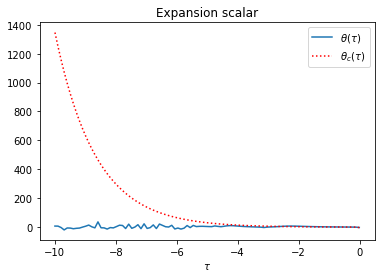

In [36]:
# Plotting the expansion scalar
expansion = 2*dR/(N*R) + dLambda/(N*Lambda)
NC = -(2*G*m*np.exp(points/(2*G*m)))**2/(2*G**2*m*(-2*m*np.exp(tau2/(4*G*m))*np.sqrt(1-np.exp(tau2/(2*G*m)))))
expansionC = 2*(np.exp(points/(2*G*m)))/(NC*(2*G*m*np.exp(points/(2*G*m)))) +\
(-np.exp(-points/(2*G*m))/(4*G*m*np.sqrt(np.exp(-points/(2*G*m))-1)))/(NC*np.sqrt(np.exp(-points/(2*G*m))-1))
mpl.plot(points,expansion, label = r'$\theta(\tau)$')
mpl.plot(points,expansionC,'r:',label = r'$\theta_c(\tau)$')
mpl.xlabel(r'$\tau$')
#mpl.xlim([-2,0])
#mpl.ylim([-2,1])
mpl.legend()
mpl.title('Expansion scalar')
mpl.show()


In [ ]:
#numerical second derivative and numerical raychaudhuri eqn
dtau = points[1]-points[0]
d2R, d2PL, d2Lambda, d2PR, dN = np.gradient(dR, dtau), np.gradient(dPL, dtau), np.gradient(dLambda, dtau), \
np.gradient(dPR, dtau), np.gradient(N, dtau)

ray = (2*d2R)/(N**2*R) - (2*dR**2)/(N**2*R**2) - (2*dN*dR)/(N**3*R) + (d2Lambda)/(Lambda*N**2) -\
(dLambda*dN)/(Lambda*N**3) - (dLambda**2)/(Lambda**2*N**2)


mpl.plot(points,expansion, label = r'$\theta(\tau)$')
mpl.plot(points,ray, label = r'$\frac{d\theta}{d\tau}$')
mpl.xlabel(r'$\tau$')
mpl.legend()
#mpl.xlim(-10,0)
#mpl.ylim(-3,5)
mpl.title('Raychaudhuri Equation')
mpl.show()

In [ ]:
# Classical equations with new tau substitution 

G = 1 
m = 1
tau3 = linspace(0.05,1.99*(G*m),1000)

RC = 2*G*m*np.exp(np.log(tau3/(2*G*m))*(1/(2*G*m)))
LC = np.sqrt(np.exp((-np.log(tau3/(2*G*m))*(1/(2*G*m))))-1)
PRC = 1/(2*G) * (2-np.exp(-np.log(tau3/(2*G*m))*1/(2*G*m)))
PLC = -2*m*np.exp(np.log(tau3/(2*G*m))*1/(4*G*m))*np.sqrt(1-np.exp(np.log(tau3/(2*G*m))*1/(2*G*m)))

mpl.plot(tau3,RC,label=r'$R_c(\tau)$')
mpl.plot(tau3,PLC,label=r'$P_{\Lambda_c}(\tau)$')
mpl.plot(tau3,LC,label=r'$\Lambda_c(\tau)$')
mpl.plot(tau3,PRC,label=r'$P_{R_c}(\tau)$')
mpl.title('Classical Equations')
mpl.xlabel(r'$\tau$')
mpl.legend()
mpl.show()

In [ ]:
INIT3 = [RC[-1], PLC[-1], LC[-1], PRC[-1]]
INIT3

In [ ]:
def odes2(tau3, x):
    
    R, PL, Lambda, PR = x

    dR = (R/(2*G*m)*sympy.cos(gamma*G*beta*((PR/(R*Lambda)) - PL/R**2))*(((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-\
    8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((sympy.pi)*struve(0,gamma*\
    G*alpha*PL/R**2)))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*alpha*PL/R**2))+\
    ((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/\
    (delt*R**2))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2)))))*(1/tau3)
    
    dPL = ((R*PR/(2*G*m*Lambda)*(sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2))))*(((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((sympy.pi)*\
    struve(0,gamma*G*alpha*PL/R**2))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*alpha*PL/R**2))+\
    ((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/\
    (delt*R**2))*((2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))))*(1/tau3)
    
    dLambda = (Lambda/(2*G*m))*((-sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2)))*((((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((((sympy.pi)*\
    struve(0,gamma*G*alpha*PL/R**2)))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*\
    alpha*PL/R**2))))+(((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*\
    gamma**2)/(delt*R**2)))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))) +((sympy.pi*struve(-1,gamma*G*alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/\
    (alpha**2*R**2) +(24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))*(2*\
    (sympy.sin(gamma*G*alpha*PL/R**2))**2))+(-8*gamma**2*sympy.cos(alpha/R)*(sympy.sin(alpha/(2*R)))**2)))/\
    ((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + ((sympy.cos(gamma*G*\
    alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) -\
    (8*(1+v)*l**2*gamma**2/(delt*R**2)))*((sympy.pi)**2*((struve(0,gamma*G*alpha*PL/R**2))**2)))+\
    (-16*gamma**2*sympy.cos(alpha/R)*(sympy.sin(alpha/(2*R)))**2)))/((2*sympy.sin(gamma*G*alpha*PL/R**2)+\
    (sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + (((2*sympy.pi*gamma**2*alpha*l**2)/(beta*R**2))*\
    (l**2/beta**2 + (32*(1-v))/delt)*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))*(((sympy.sin(gamma*G*alpha*\
    PL/R**2)*struve(-1,gamma*G*alpha*PL/R**2))-(sympy.cos(gamma*G*alpha*PL/R**2)*struve(0,gamma*G*alpha*PL/R**2)))/\
    ((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2)))*(1/tau3)
    
    dPR = (((R*PR-2*Lambda*PL)/(2*G*m*R) * (sympy.cos(gamma*G*beta*(PR/(R*Lambda)-PL/R**2))))*(((((1+((2*l**4)*\
    gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*\
    ((sympy.pi*struve(0,gamma*G*alpha*PL/R**2))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*\
    PL/R**2)))+((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/\
    (delt*R**2)))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))))+((sympy.pi*Lambda*PL*sympy.sin(alpha*gamma*G*PL/R**2)*struve(-1,gamma\
    *G*alpha*PL/R**2))/(G*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2))))*\
    (1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))+\
    ((sympy.pi*Lambda*struve(0,gamma*G*alpha*PL/R**2))/((G**2*m*R)*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
    struve(0,gamma*G*alpha*PL/R**2))))*((sympy.sin(gamma*G*alpha*PL/R**2)*(2*l**4*gamma/alpha**3 + 24*l**2*\
    gamma/(alpha*deltx)-(8*gamma*l**2*(1+v))/(alpha*delt)))+(G*PL*sympy.cos(gamma*G*alpha*PL/R**2))*\
    (1+2*l**4*gamma**2/((R**2)*alpha**2)+24*l**2*gamma**2/(R**2*deltx)-8*gamma**2*l**2*(1+v)/(R**2*delt))) +\
    (((Lambda*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))/(G**2*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+\
    sympy.pi*struve(0,gamma*G*alpha*PL/R**2))))*((G*sympy.pi*alpha/beta*PL*struve(0,gamma*G*alpha*PL/R**2))*\
    (1+2*l**4*gamma**2/(R**2*beta**2)+8*l**2*gamma**2*(3-v)/(R**2*delt)-(8*l**2*gamma**2/\
    (R**2*deltx**2))))+(2*sympy.pi*struve(0,gamma*G*alpha*PL/R**2))*(l**4*gamma/beta**3 + 4*l**2*gamma*(3-v)/\
    (beta*delt)-4*l**2*gamma/(beta*deltx))+(sympy.sin(gamma*G*alpha*PL/R**2))*(2*l**4*gamma/beta**3+16*l**2*gamma*\
    (3*v-1)/(beta*delt)-16*l**2*gamma/(beta*deltx))+(2*G*PL*alpha/beta)*sympy.cos(gamma*G*alpha*PL/R**2)*\
    ((1+l**4*gamma**2/(R**2*beta**2))+8*l**2*gamma**2*(3*v-1)/(R**2*delt)-8*l**2*gamma**2/(R**2*deltx)))-\
    (2*gamma*Lambda/(G**2*m))*(sympy.sin(alpha/R)-sympy.sin(2*alpha/R))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+\
    sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))*(1/tau3)
    
    return [dR, dPL, dLambda, dPR]

x03 = INIT3
    
tau3 = [1.99,0.5]
points3 = np.linspace(1.9,0.5,1000)
solve = solve_ivp(odes2,tau3,x03,t_eval = points3)

R, PL, Lambda, PR = solve.y

#Computing the defined Lapse
N = -(gamma*epsilon*R)/(G*m*(np.sin(PL/R)+(sympy.pi/2)*struve(0,PL/R)))

mpl.plot(points3,R,label=r'$R(\tau)$')
mpl.plot(points3,PL,label=r'$P_{\Lambda}(\tau)$')
mpl.plot(points3,Lambda,label=r'$\Lambda(\tau)$')
mpl.plot(points3,PR,label=r'$P_R(\tau)$')
mpl.plot(points3,N,label=r'$N(\tau)$')
mpl.title('Quantum Equations')
#mpl.xlim([0,2])
#mpl.ylim([-1,10])
mpl.xlabel(r'$\tau$')
mpl.legend()
mpl.show()


In [ ]:
dR = ((R/(2*G*m)*np.cos(gamma*G*beta*((PR/(R*Lambda)) - PL/R**2))*(((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-\
8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((sympy.pi)*struve(0,gamma*\
G*alpha*PL/R**2)))/(2*np.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*alpha*PL/R**2))+\
((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/\
(delt*R**2))*(2*np.sin(gamma*G*alpha*PL/R**2)/(2*np.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
struve(0,gamma*G*alpha*PL/R**2)))))*(1/points3))*points3
    
dPL = (((R*PR/(2*G*m*Lambda)*(np.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2))))*(((1+((2*l**4)*gamma**2)/\
((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((sympy.pi)*\
struve(0,gamma*G*alpha*PL/R**2))/(2*np.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*alpha*PL/R**2))+\
((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/\
(delt*R**2))*((2*np.sin(gamma*G*alpha*PL/R**2)/(2*np.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
struve(0,gamma*G*alpha*PL/R**2))))))*(1/points3))*points3
    
dLambda = ((Lambda/(2*G*m))*((-np.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2)))*((((1+((2*l**4)*gamma**2)/((beta**2)*\
R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*((((sympy.pi)*struve(0,gamma*G*alpha*\
PL/R**2)))/(2*np.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*struve(0,gamma*G*alpha*PL/R**2))))+(((1+((l**4)*\
gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/(delt*R**2)))*\
(2*np.sin(gamma*G*alpha*PL/R**2)/(2*np.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2))))) + \
((sympy.pi*struve(-1,gamma*G*alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/(alpha**2*R**2) + \
(24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))*(2*(np.sin(gamma*G*alpha*PL/R**2))**2))+\
(-8*gamma**2*np.cos(alpha/R)*(np.sin(alpha/(2*R)))**2)))/((2*np.sin(gamma*G*alpha*PL/R**2)+\
(sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + ((np.cos(gamma*G*alpha*PL/R**2))*(((1+(2*l**4*gamma**2)/\
(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) -(8*(1+v)*l**2*gamma**2/(delt*R**2)))*((sympy.pi)**2*\
((struve(0,gamma*G*alpha*PL/R**2))**2)))+(-16*gamma**2*np.cos(alpha/R)*(np.sin(alpha/(2*R)))**2)))/\
((2*np.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2) + (((2*sympy.pi*gamma**2*alpha*\
l**2)/(beta*R**2))*(l**2/beta**2 + (32*(1-v))/delt)*np.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))*\
(((np.sin(gamma*G*alpha*PL/R**2)*struve(-1,gamma*G*alpha*PL/R**2))-(np.cos(gamma*G*alpha*PL/R**2)*\
struve(0,gamma*G*alpha*PL/R**2)))/((2*np.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))**2)))\
*(1/points3))*points3
    
dPR = ((((R*PR-2*Lambda*PL)/(2*G*m*R) * (np.cos(gamma*G*beta*(PR/(R*Lambda)-PL/R**2))))*(((((1+((2*l**4)*\
gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*\
((sympy.pi*struve(0,gamma*G*alpha*PL/R**2))/(2*np.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*\
PL/R**2)))+((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/\
(delt*R**2)))*(2*np.sin(gamma*G*alpha*PL/R**2)/(2*np.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
struve(0,gamma*G*alpha*PL/R**2))))))+((sympy.pi*Lambda*PL*np.sin(alpha*gamma*G*PL/R**2)*struve(-1,gamma\
*G*alpha*PL/R**2))/(G*m*R*(2*np.sin(gamma*G*alpha*PL/R**2)+sympy.pi*struve(0,gamma*G*alpha*PL/R**2))))*\
(1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))+\
((sympy.pi*Lambda*struve(0,gamma*G*alpha*PL/R**2))/((G**2*m*R)*(2*np.sin(gamma*G*alpha*PL/R**2)+sympy.pi*\
struve(0,gamma*G*alpha*PL/R**2))))*((np.sin(gamma*G*alpha*PL/R**2)*(2*l**4*gamma/alpha**3 + 24*l**2*\
gamma/(alpha*deltx)-(8*gamma*l**2*(1+v))/(alpha*delt)))+(G*PL*np.cos(gamma*G*alpha*PL/R**2))*\
(1+2*l**4*gamma**2/((R**2)*alpha**2)+24*l**2*gamma**2/(R**2*deltx)-8*gamma**2*l**2*(1+v)/(R**2*delt))) +\
(((Lambda*np.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))/(G**2*m*R*(2*np.sin(gamma*G*alpha*PL/R**2)+\
sympy.pi*struve(0,gamma*G*alpha*PL/R**2))))*((G*sympy.pi*alpha/beta*PL*struve(0,gamma*G*alpha*PL/R**2))*\
(1+2*l**4*gamma**2/(R**2*beta**2)+8*l**2*gamma**2*(3-v)/(R**2*delt)-(8*l**2*gamma**2/\
(R**2*deltx**2))))+(2*sympy.pi*struve(0,gamma*G*alpha*PL/R**2))*(l**4*gamma/beta**3 + 4*l**2*gamma*(3-v)/\
(beta*delt)-4*l**2*gamma/(beta*deltx))+(np.sin(gamma*G*alpha*PL/R**2))*(2*l**4*gamma/beta**3+16*l**2*gamma*\
(3*v-1)/(beta*delt)-16*l**2*gamma/(beta*deltx))+(2*G*PL*alpha/beta)*np.cos(gamma*G*alpha*PL/R**2)*\
((1+l**4*gamma**2/(R**2*beta**2))+8*l**2*gamma**2*(3*v-1)/(R**2*delt)-8*l**2*gamma**2/(R**2*deltx)))-\
(2*gamma*Lambda/(G**2*m))*(np.sin(alpha/R)-np.sin(2*alpha/R))/(2*np.sin(gamma*G*alpha*PL/R**2)+\
sympy.pi*struve(0,gamma*G*alpha*PL/R**2)))*(1/points3))*points3

In [ ]:
expansion = 2*dR/(N*R) + dLambda/(N*Lambda)
mpl.plot(points3,expansion, label = r'$\theta(\tau)$')
mpl.xlabel(r'$\tau$')
mpl.legend()
mpl.xlim([0,2])
mpl.title('Expansion scalar')
mpl.show()

In [ ]:
#INCORRRECT CURRENTLY
dtau3 = points3[1] - points3[0]

d2R, d2PL, d2Lambda, d2PR, dN = np.gradient(dR, dtau3), np.gradient(dPL, dtau3), np.gradient(dLambda, dtau3), \
np.gradient(dPR, dtau3), np.gradient(N, dtau3)

ray = (2*(((points3)**2)*d2R+points3*dR))/(N**2*R) - (2*dR**2)/(N**2*R**2) - (2*dN*dR)/(N**3*R)\
+ (((points3)**2)*d2Lambda+points3*dLambda)/(Lambda*N**2) - (dLambda*dN)/(Lambda*N**3) - (dLambda**2)/(Lambda**2*N**2)

mpl.plot(points3,expansion, label = r'$\theta(\tau)$')
mpl.plot(points3,ray, label = r'$\frac{d\theta}{d\tau}$')
mpl.xlabel(r'$\tau$')
mpl.xlim(0,2)
mpl.ylim(-5,6)
mpl.legend()
mpl.title('Raychaudhuri Equation and expansion')
mpl.show()